# Womanium WISER Quantum project 2025
# Project 1 - Quantum Walk and Monte Carlo
# Jesmer Wong (gst-lUiSStdno9Zl8Tn)
# jesmer.wong@gmail.com
# https://www.linkedin.com/in/jesmerwong

# 0. Install qiskit and related libraries if needed

In [63]:
!pip install qiskit qiskit_ibm_runtime qiskit_aer pylatexenc qiskit_ibm_provider

# 1. Import libraries

In [1]:
# Import libraries
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

import pandas as pd
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings('ignore')

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

Qiskit version: 2.1.1


# 2. Samples on 1-layer, 2-layers, 4-layers on Quantum Walk

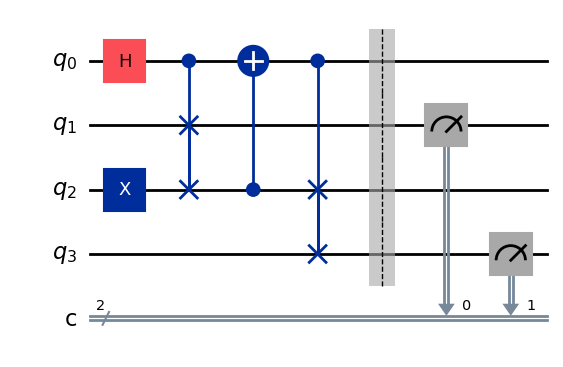

In [ ]:
qbit = QuantumRegister(4, name = 'q')
cbit = ClassicalRegister(2, name = 'c')
qc = QuantumCircuit(qbit, cbit)

qc.h(qbit[0])
qc.x(qbit[2])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[1], target_qubit2=qbit[2])
qc.cx(qbit[2], qbit[0])
qc.cswap(control_qubit=qbit[0], target_qubit1=qbit[2], target_qubit2=qbit[3])
qc.barrier()
qc.measure(qbit[1], cbit[0])
qc.measure(qbit[3], cbit[1])

qc.draw('mpl')

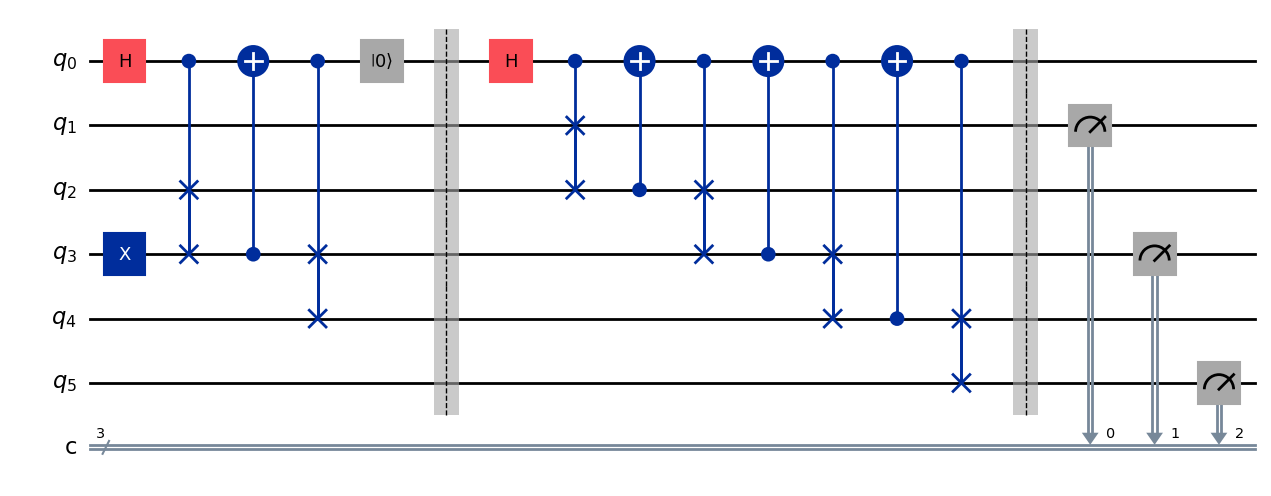

In [ ]:
qbit = QuantumRegister(4 + 2, name = 'q')
cbit = ClassicalRegister(2 + 1, name = 'c')
qc = QuantumCircuit(qbit, cbit)

# Level 1
qc.h(qbit[0])
qc.x(qbit[2 + 1]) # For state 1>
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[1 + 1], target_qubit2=qbit[2 + 1]) #
qc.cx(qbit[2 + 1], qbit[0])
qc.cswap(control_qubit=qbit[0], target_qubit1=qbit[2 + 1], target_qubit2=qbit[3 + 1])
qc.reset(qbit[0])
qc.barrier()

# Level 2
qc.h(qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[1], target_qubit2=qbit[2])
qc.cx(qbit[2], qbit[0])
qc.cswap(control_qubit=qbit[0], target_qubit1=qbit[2], target_qubit2=qbit[3])
qc.cx(qbit[2 + 1], qbit[0]) ##
qc.cswap(control_qubit=qbit[0], target_qubit1=qbit[2 + 1], target_qubit2=qbit[3 + 1]) #
qc.cx(qbit[2 + 2], qbit[0]) ##
qc.cswap(control_qubit=qbit[0], target_qubit1=qbit[2 + 2], target_qubit2=qbit[3 + 2]) #
qc.barrier()

qc.measure(qbit[1], cbit[0])
qc.measure(qbit[3], cbit[1])
qc.measure(qbit[5], cbit[2])

qc.draw('mpl')

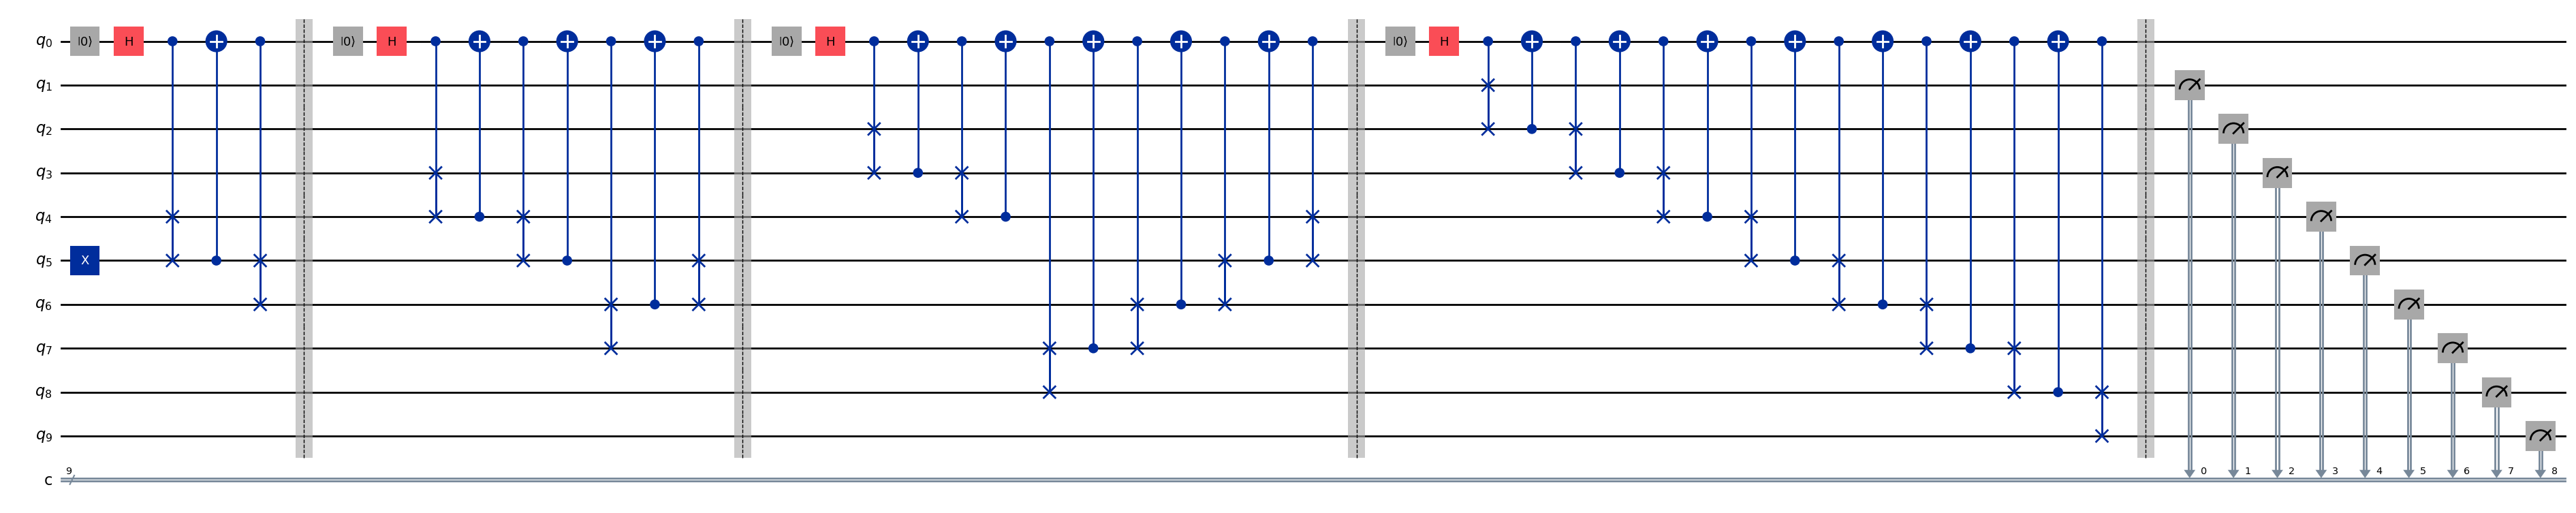

In [ ]:
qbit = QuantumRegister(4 + 2 + 2 + 2, name = 'q')
cbit = ClassicalRegister(9, name = 'c')
qc = QuantumCircuit(qbit, cbit)

# Level 1
qc.reset(qbit[0])
qc.h(qbit[0])
qc.x(qbit[2 + 1 + 1 + 1]) # For state 1>
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[4], target_qubit2=qbit[5]) # 1 + 1 + 1 + 1, 2 + 1 + 1 + 1
qc.cx(qbit[5], qbit[0])
qc.cswap(control_qubit=qbit[0], target_qubit1=qbit[5], target_qubit2=qbit[6])
qc.barrier()

# Level 2
qc.reset(qbit[0])
qc.h(qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[3], target_qubit2=qbit[4])
qc.cx(qbit[4], qbit[0])
qc.cswap(control_qubit=qbit[0], target_qubit1=qbit[4], target_qubit2=qbit[5])
qc.cx(qbit[5], qbit[0])
qc.cswap(control_qubit=qbit[0], target_qubit1=qbit[6], target_qubit2=qbit[7]) #
qc.cx(qbit[6], qbit[0]) ##
qc.cswap(control_qubit=qbit[0], target_qubit1=qbit[5], target_qubit2=qbit[6]) #
qc.barrier()

# Level 3
qc.reset(qbit[0])
qc.h(qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[2], target_qubit2=qbit[3])
qc.cx(qbit[3], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[3], target_qubit2=qbit[4])
qc.cx(qbit[4], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[7], target_qubit2=qbit[8])
qc.cx(qbit[7], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[7], target_qubit2=qbit[6])
qc.cx(qbit[6], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[6], target_qubit2=qbit[5])
qc.cx(qbit[5], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[4], target_qubit2=qbit[5])
qc.barrier()

# Level 4
qc.reset(qbit[0])
qc.h(qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[1], target_qubit2=qbit[2])
qc.cx(qbit[2], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[2], target_qubit2=qbit[3])
qc.cx(qbit[3], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[3], target_qubit2=qbit[4])
qc.cx(qbit[4], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[4], target_qubit2=qbit[5])
qc.cx(qbit[5], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[5], target_qubit2=qbit[6])
qc.cx(qbit[6], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[6], target_qubit2=qbit[7])
qc.cx(qbit[7], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[7], target_qubit2=qbit[8])
qc.cx(qbit[8], qbit[0])
qc.cswap(control_qubit = qbit[0], target_qubit1=qbit[8], target_qubit2=qbit[9])

qc.barrier()
for i in range(9):
    qc.measure(qbit[i+1], cbit[i])

qc.draw('mpl', fold = -1)

# 3. n-layer generalization function (qpeg)
### Input: number of layers (n),
### Input: list of bias angles (bias_lst) in radians, eg. [np.pi * 2/3, np.pi/4] etc.
### Note - bias_lst is pre-checked to reject non-numeric inputs and list of incorrect lengths
### Note - 1-layer and 2-layers are not implemented for simplification purpose

In [37]:
def qpeg(lvl = 4, bias_lst = None):
  # Pre-conditions and pre-checks
  assert lvl >= 3
  lvl = int(lvl)

  # Pre-check function on bias_lst
  # ========================
  def check_bias_lst(bias_lst):
    '''
    Check on all (possible) formattings to the list input.
    Return False if not complying list of radians, which turns back to a non-bias version.
    '''

    if bias_lst is None or bias_lst in ('', [], ['']): # Check bias_lst option
      print('Non-biased circuit.')
      return False
    else:
      if isinstance(bias_lst, list):
        if all([isinstance(j, float) for j in bias_lst]): # Check bias_lst as all numeric
          if len(bias_lst) == lvl:
            rtn = bias_lst # Correct output here, allocate each bias value to each of layer
          else:
            print('Length of bias list does not match with total length of all layers (input, hidden and output). Taking first numeric value and apply for all layers instead.')
            rtn = [bias_lst[0]] * lvl # Select one value then extend to list of length = No of layers
        else:
          print('All values inside the bias list has to be a list of angles in radians.')
          return False
      else:
        print('Bias list has to be a list.')
        return False

      return rtn

  bias_lst = check_bias_lst(bias_lst)
  # print(bias_lst)

  # Define quantum circuit size
  # ========================
  TTL_QBIT = 4 + 2 * (lvl - 1) # 1-lvl: 4 + 2 x 0; 2-lvl: 6 = 4 + 2 x 1; 4-lvl: 10 = 4 + 2 x 3; >> n-lvl: 4 + 2 x ( lvl -1 )
  N_HIDDEN = lvl - 2

  qbit = QuantumRegister(TTL_QBIT, name = 'q')
  cbit = ClassicalRegister(TTL_QBIT-1, name = 'c')
  qc = QuantumCircuit(qbit, cbit)

  # Identify mid-point of lvl
  # ========================
  MID_LVL = TTL_QBIT // 2 # if lvl > 3
  MID_QBIT = qbit[MID_LVL]


  '''
  1)
  Total layers: 1 x Top layer + (lvl - 2) x hidden layer + 1 Output layer + Measure; lvl > 2
  4-level: 1T + 2H + 1O + 1M
  5-level: 1T + 3H + 1O + 1M

  2)
  At Top layer: reset + A
  At each hidden layer: reset + A + B
  At Output layer: reset + A + B with ladder to the end
  '''

  # Helper functions
  # ========================
  # For Input and common part
  # ========================
  def swap_minus_plus(qc, b):
      # FOR PART A ONLY - Center at b-th qubit, then -1 @ b-th qubit, cx, + 1 @ qubit
      qc.cswap(control_qubit = qbit[0], target_qubit1 = qbit[b - 1], target_qubit2 = qbit[b])
      qc.cx(control_qubit = qbit[b], target_qubit = 0)
      qc.cswap(control_qubit = qbit[0], target_qubit1 = qbit[b], target_qubit2 = qbit[b + 1])
      return qc

  # For Hidden part
  # ========================
  def swap_minus_ladder(qc, b):
      qc.cx(control_qubit = qbit[b], target_qubit = 0)
      qc.cswap(control_qubit = qbit[0], target_qubit1 = qbit[b - 1], target_qubit2 = qbit[b])
      return qc

  def swap_plus_minus_ladder(qc, b, until):
      # FOR PART B ONLY - +1 @ b-th qubit, then { Center at b-th qubit, then -1 } x ladder
      qc.cswap(control_qubit = qbit[0], target_qubit1 = qbit[b + 1], target_qubit2 = qbit[b])

      for i in range(b, until, -1):
          swap_minus_ladder(qc, b)
          b -= 1

      return qc

  # For Output part
  # ========================
  def swap_plus_ladder(qc, b):
      qc.cx(control_qubit = qbit[b], target_qubit = 0)
      qc.cswap(control_qubit = qbit[0], target_qubit1 = qbit[b], target_qubit2 = qbit[b + 1])
      return qc

  def swap_plus_only(qc):
      qc.cswap(control_qubit = qbit[0], target_qubit1 = qbit[3], target_qubit2 = qbit[4]) # The first CSWAP
      for i in range(4, TTL_QBIT - 1, 1):
          swap_plus_ladder(qc, i)
      return qc

  # Implement Circuit
  # ========================
  '''
  Top part: reset + A + /  (A: swap_min_plus from center qbit (-1 / + 1) )
  Reset with choice on H or Rx
  '''
  # ========================
  qc.reset(qbit[0])

  if bias_lst == False: # Pre-checked
    qc.h(0)
  else:
    qc.rx(bias_lst[0], 0)

  qc.x(MID_QBIT)
  swap_minus_plus(qc, MID_LVL)
  qc.barrier()


  '''
  Hidden parts: reset + A + B
  A: derail every -1 ladder qubit from lvl first, then swap_minus_plus (-1 / + 1)
  Then connect with cx(derailed qbit, 0)
  B: derail +1 + ladder qubit from lvl first, then swap_plus_minus_ladder
  '''
  # ========================

  for i in range(0, N_HIDDEN): # each hidden layer
    # Same reset
    qc.reset(qbit[0])

    if bias_lst == False: # Pre-checked
      qc.h(0)
    else:
      qc.rx(bias_lst[i + 1], 0)

    # Derail the swap unit by -1 qubit per each layer
    swap_minus_plus(qc, MID_LVL - i-1)
    qc.cx(MID_LVL - i, 0) # connect

    CURRENT_CX = MID_LVL - i

    swap_plus_minus_ladder(qc, MID_LVL + 1 + i, until = CURRENT_CX)
    qc.barrier()


  '''
  Output part: A + C
  '''
  # ========================

  qc.reset(qbit[0])

  if bias_lst == False: # Pre-checked
    qc.h(0)
  else:
    qc.rx(bias_lst[-1], 0)

  swap_minus_plus(qc, 2)
  qc.cx(3, 0)
  swap_plus_only(qc)
  qc.barrier()


  # Measure all except control qubit
  # ========================
  qc.measure(qbit[1:], cbit)

  return qc

# Drawing a 7-layer circuit (biased and non-biased) as a testing

Length of bias list does not match with total length of all layers (input, hidden and output). Taking first numeric value and apply for all layers instead.


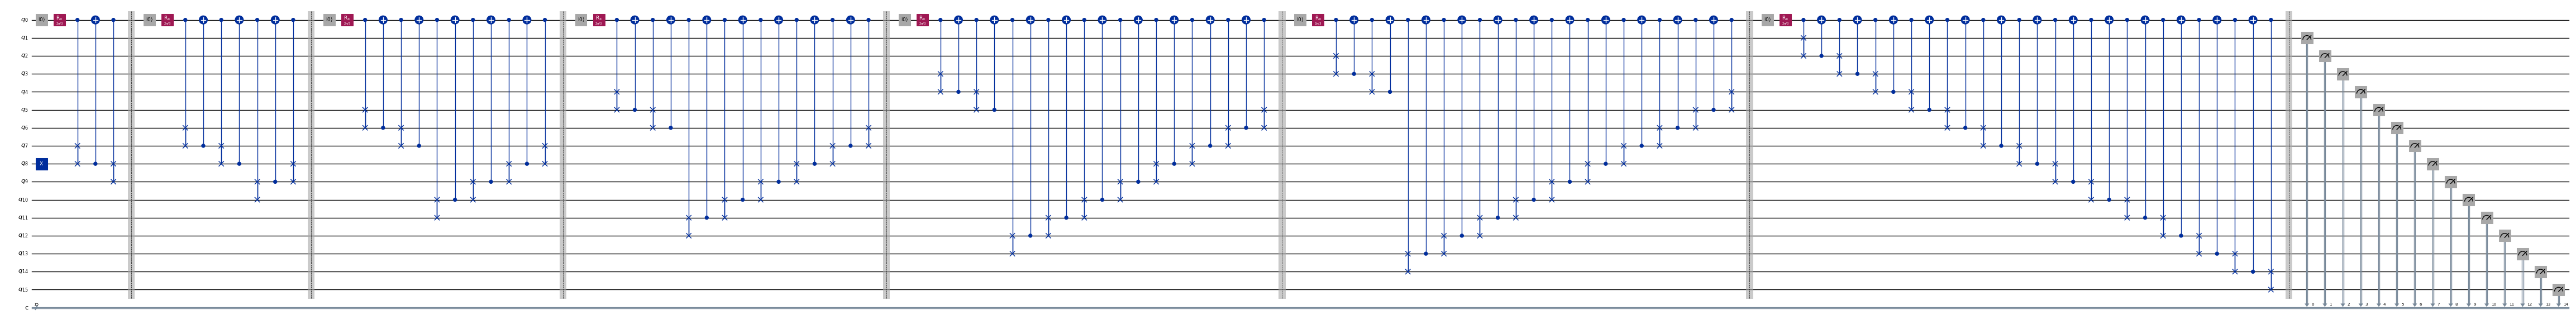

In [38]:
qc = qpeg(7, [np.pi * 2/3])
qc.draw('mpl', scale = 0.5, fold = -1)

In [73]:
def execute_run(backend_choice, qc, opt_lvl):

  # Getting circuit qubit requirements
  # ========================
  N_QUBITS = qc.num_qubits

  # Switch on Aer vs Real backend
  # ========================
  if backend_choice == 'real':
    from qiskit_ibm_runtime import QiskitRuntimeService

    # Using personal profile
    TOKEN = 'URim0DhZSka5DobwGxkKx8vf6jQFBPcdoWdx7hTHjEyT' # API
    INSTANCE = 'crn:v1:bluemix:public:quantum-computing:us-east:a/e36151fb7469401399682b23f40cf93f:5781bcf8-f90f-4942-bb7a-49382c1ea539::' # CRN number
    QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token=TOKEN, instance=INSTANCE, overwrite=True)

    # Obtain service
    service = QiskitRuntimeService()
    service.backends(filters=lambda b: b.configuration().num_qubits > N_QUBITS)

    # Get a least busy backend
    backend = service.least_busy(operational=True, simulator=False)

  elif backend_choice == 'fake': # A fakeprovider
    from qiskit_ibm_runtime.fake_provider import FakeManilaV2
    backend = FakeManilaV2()

  elif backend_choice == 'ibmp': # Interact with Quantum Hardware
    from qiskit_ibm_provider import IBMProvider

    provider = IBMProvider()
    backend = provider.get_backend("ibmq_qasm_simulator")

  elif backend_choice == 'aer':
    backend = AerSimulator() # Local simulation with GPU support

  # make quantum circuit compatible to the backend
  # ========================
  pm = generate_preset_pass_manager(backend = backend, optimization_level=opt_lvl)
  qc_isa = pm.run(qc)

  # run and get counts
  # ========================
  sampler = Sampler(mode=backend)
  counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c.get_counts()

  return counts

# 4. Execution
# Case format: [A]-[B]-[C]-[D]
#### [A]: using Theoretical (1: Aer Simulator) vs Real backend (2)
#### [B]: Non-biased circuit, ie. with Hadamard gate (A) vs Biased circuit, ie. Rx (B)
#### [C]: No. of layers
#### [D]: Transpilation optimization level (1, 2 or 3)

# 4.1. Aer simulator



### Case 1-A-7-1: Non-biased 7 layer with optimization level = 1

Non-biased circuit.


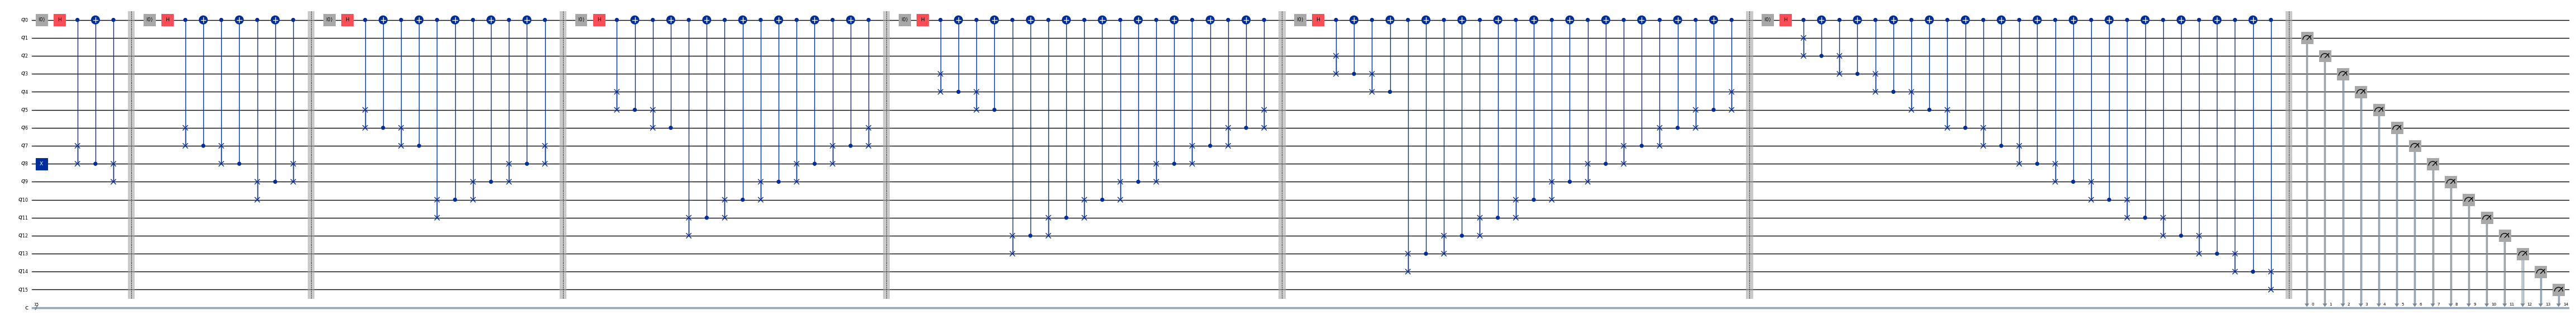

In [75]:
qc = qpeg(7)
qc.draw('mpl', scale = 0.5, fold = -1)

In [84]:
non_biased_circuit_depth = []
for i in range(3, 10, 1):
  tmp_qc = qpeg(i)
  non_biased_circuit_depth.append(tmp_qc.depth())

non_biased_circuit_depth

Non-biased circuit.
Non-biased circuit.
Non-biased circuit.
Non-biased circuit.
Non-biased circuit.
Non-biased circuit.
Non-biased circuit.


[28, 45, 66, 91, 120, 153, 190]

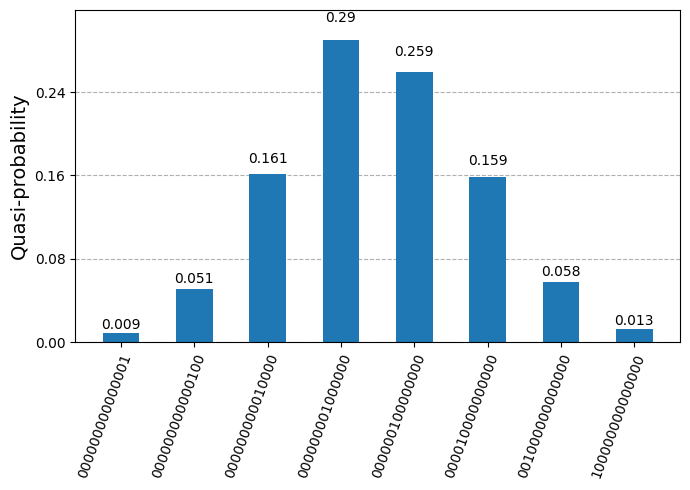

In [76]:
counts = execute_run(backend_choice = 'aer', qc = qc, opt_lvl = 1)
plot_distribution(counts)

### Case 1-A-7-2: Non-biased 7 layer with optimization level = 2

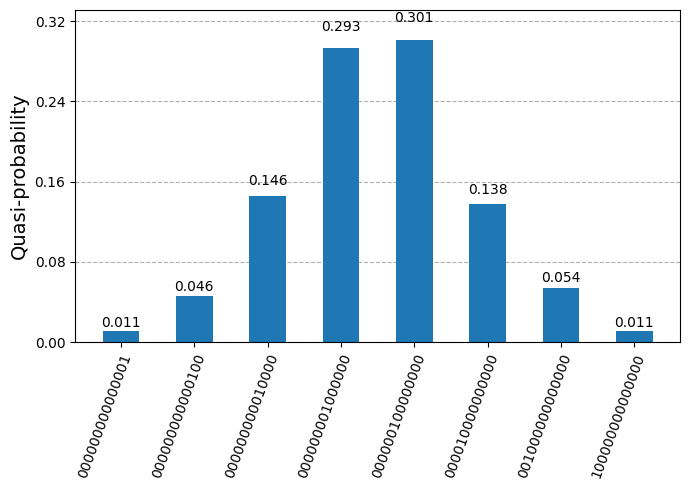

In [77]:
counts = execute_run(backend_choice = 'aer', qc = qc, opt_lvl = 2)
plot_distribution(counts)

### Case 1-A-7-2: Non-biased 7 layer with optimization level = 3

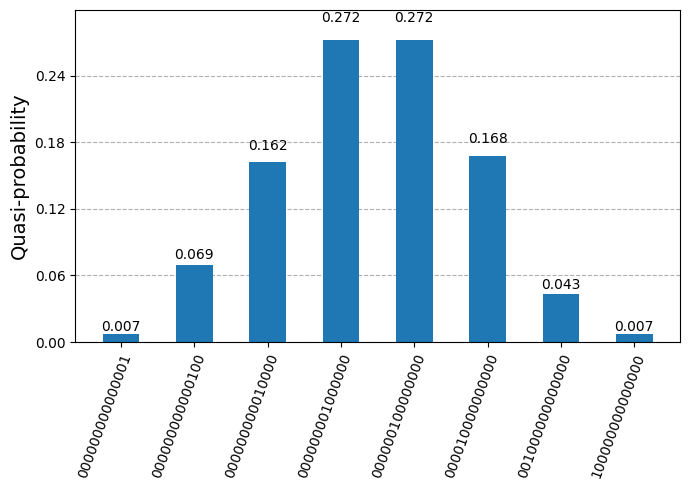

In [78]:
counts = execute_run(backend_choice = 'aer', qc = qc, opt_lvl = 3)
plot_distribution(counts)

### Case 1-B-7-1: Biased (2*pi/3) 7 layer with optimization level = 1

Length of bias list does not match with total length of all layers (input, hidden and output). Taking first numeric value and apply for all layers instead.


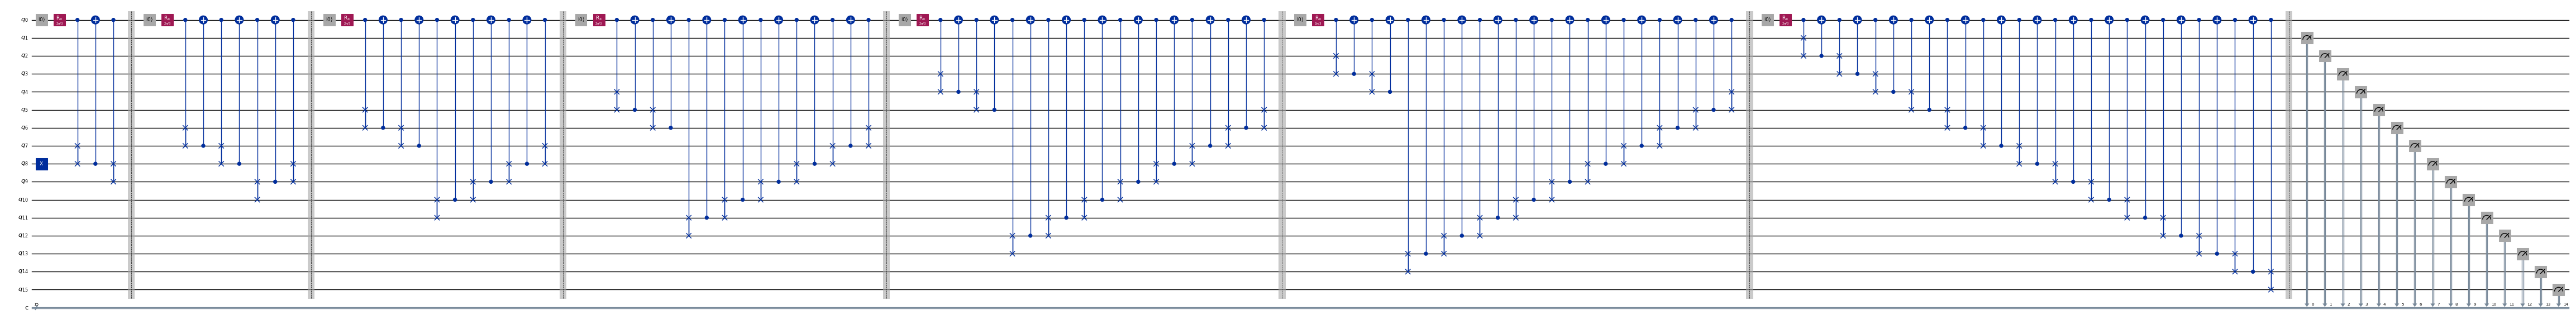

In [79]:
qc = qpeg(7, [np.pi * 2/3])
qc.draw('mpl', scale = 0.5, fold = -1)

In [85]:
non_biased_circuit_depth = []
for i in range(3, 10, 1):
  tmp_qc = qpeg(i, [np.pi * 2/3])
  non_biased_circuit_depth.append(tmp_qc.depth())

non_biased_circuit_depth

Length of bias list does not match with total length of all layers (input, hidden and output). Taking first numeric value and apply for all layers instead.
Length of bias list does not match with total length of all layers (input, hidden and output). Taking first numeric value and apply for all layers instead.
Length of bias list does not match with total length of all layers (input, hidden and output). Taking first numeric value and apply for all layers instead.
Length of bias list does not match with total length of all layers (input, hidden and output). Taking first numeric value and apply for all layers instead.
Length of bias list does not match with total length of all layers (input, hidden and output). Taking first numeric value and apply for all layers instead.
Length of bias list does not match with total length of all layers (input, hidden and output). Taking first numeric value and apply for all layers instead.
Length of bias list does not match with total length of all laye

[28, 45, 66, 91, 120, 153, 190]

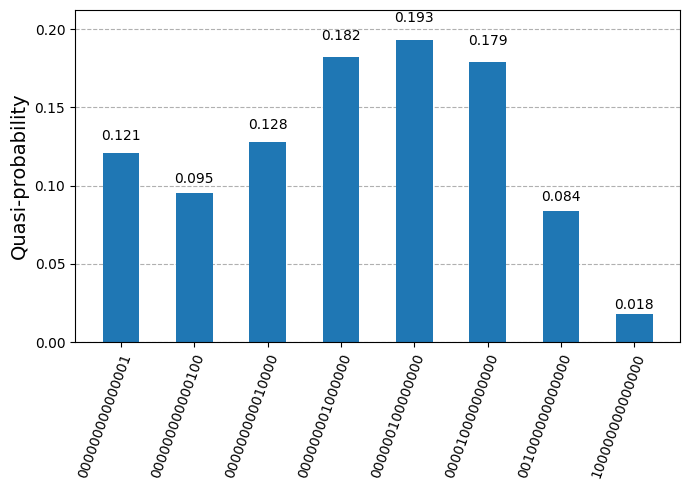

In [80]:
counts = execute_run(backend_choice = 'aer', qc = qc, opt_lvl = 1)
plot_distribution(counts)

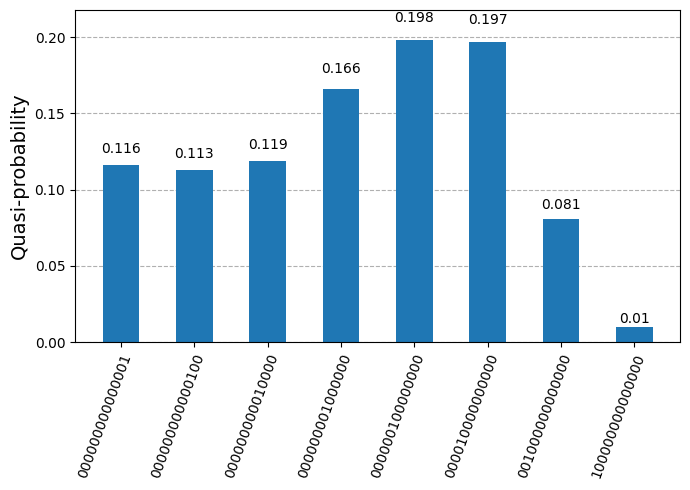

In [83]:
counts = execute_run(backend_choice = 'aer', qc = qc, opt_lvl = 2)
plot_distribution(counts)

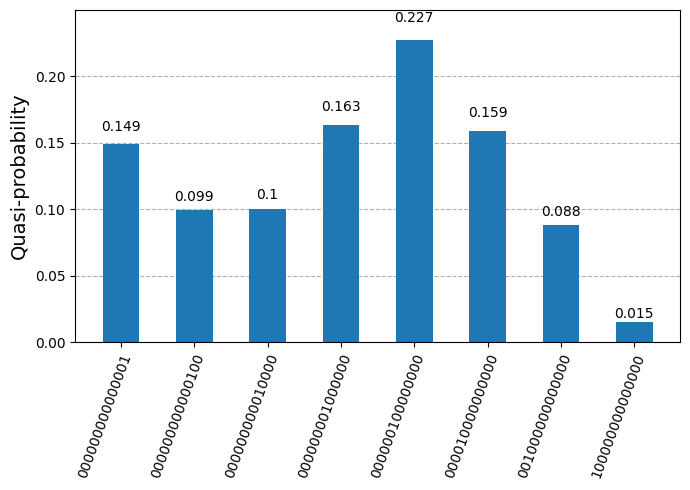

In [82]:
counts = execute_run(backend_choice = 'aer', qc = qc, opt_lvl = 3)
plot_distribution(counts)

# 2. Real backend (skipped)